<a href="https://colab.research.google.com/github/WenluXu/Data-Science-Bootcamp-2022/blob/main/Week_3_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exploratory Data Analysis: EDA refers to the critical process of performaing initial investigations on the data to discover patterns, detect anomalies, spot hypothesis and verify assumptions with statistical values.

To fo so, we will use 2 datasets
* 1. Flight_prediction.xlsx
* 2. forest_fires_dataset.csv

### To follow along download the datasets and upload in the colab session.

## Import the required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Start with importing the data and displaying few entries of it.

In [ ]:
df = pd.read_excel("/content/Flight_prediction.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.columns

In [ ]:
len(df)

### Check Null Values

In [ ]:
df.isna().sum()

### Check Information and Datatype of all columns

In [ ]:
df.info()

###  Change the Datatype of column Total_Stops

In [ ]:
df.Total_Stops.unique()


In [ ]:
df['Total_Stops'] = df['Total_Stops'].str.replace('non-stop','0')
df.Total_Stops.head()

### Cleaning all such entries for the Total_Stops column

In [ ]:
df['Total_Stops'] = df['Total_Stops'].str.replace('1 stop','1')
df['Total_Stops'] = df['Total_Stops'].str.replace('2 stops','2')
df['Total_Stops'] = df['Total_Stops'].str.replace('3 stops','3')
df['Total_Stops'] = df['Total_Stops'].str.replace('4 stops','4')
df['Total_Stops'] = df['Total_Stops'].astype(float)

### Removing the na with a median value

In [ ]:
df['Total_Stops'] = df['Total_Stops'].fillna(df['Total_Stops'].median())
df['Total_Stops'] = df['Total_Stops'].astype(int)
df.Total_Stops.unique()

In [ ]:
df.dtypes

In [ ]:
df.Total_Stops.head()

### Handling some more columns from the Data

In [ ]:
df.Date_of_Journey.head()

### Change the data of column Date_of_Journey to Datetime

In [ ]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey']).dt.date

df.info()

In [ ]:
df.Arrival_Time.unique()

In [ ]:
df.Arrival_Time.head()

### Split the data values and store

In [ ]:
df['Arrival_Time'] = [i.split(' ')[0] for i in df['Arrival_Time']]
df.head()

### Categorical Features

In [ ]:
df.info()

In [ ]:
cat_features = [i for i in df.columns if df[i].dtypes == 'O']

print("We have {} Catergorical features: {}".format(len(cat_features),cat_features))

We have 1 Catergorical features: ['year']


### We will be using a bit of Matplotlib and SNS for plotting some statistical data.

### 1. plt.subplot(rows, columns, position)
### 2. sns.scatterplot(X_axis, Y_axis, DataSet)

In [ ]:
lst = ['Airline','Source','Destination']

fig = plt.figure(figsize=(15,10))

for i in range(0,len(lst)):
    ax = plt.subplot(3,1,i+1)
    sns.scatterplot(x='Price',y=lst[i],data=df)
    plt.tight_layout()

NameError: ignored

**Observation**
* Price is high on Destination Delhi and Source Banglore
* Price also high for Jet Airways and Jet Airways Business Airline

### Counting different routes for all the travel entries

In [ ]:
df['Route'].value_counts()

**Observation**
* Total 2376 flights are Delhi to Cochin Route.
* Total 1552 flights are Bengluru to Delhi Route.
* Total 979 flights are Kolkata to Bengluru Route.

### Plotting all the route with its stops along the way

In [ ]:
fig = plt.figure(figsize=(17,20))

plt.title('Route vs Total_Stops',fontsize=30,y=1.)

sns.scatterplot(y='Route',x='Total_Stops',data=df)

plt.xlabel("Total_stops",fontsize=20,weight=20)
plt.ylabel("Route",fontsize=20,weight=20)

**Observation**
* Bengluru to Delhi,Mumbai to Hyderabad,Delhi to Kolkata and Kolkata to Bengluru has 0  Stops.
* Bengluru to Kolkata to Bhubaneswar to Hydrabad to Vijayawada to Delhi has 4 Stops.
* Most of the Flights have either 1 or 2 stops/halts before reaching the destination

### Plotting all the routs and the Flights that passes through it.

In [ ]:
fig = plt.figure(figsize=(25,20))

plt.title("Airline vs Route",fontsize=25,y=1.)
sns.scatterplot(x='Airline',y='Route',data=df)

plt.xlabel("Airline",fontsize=25,weight='bold')
plt.ylabel("Route",fontsize=25,weight='bold')

**Observation**  
* Air India flights pass through each of the given routes.

### We will see a visual airlines count using a Pie Chart

In [ ]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [ ]:
values = df['Airline'].value_counts().values

index = df['Airline'].value_counts().index


array([3849, 2053, 1752, 1196,  818,  479,  319,  194,   13,    6,    3,
          1])

([<matplotlib.patches.Wedge at 0x7fd54024ae90>,
 [Text(-0.3760867399283128, 1.0337111608423766, 'Jet Airways'),
  Text(-0.9559601311497364, -0.5441876768654162, 'IndiGo'),
  Text(0.07482753733604135, -1.0974519760136312, 'Air India'),
  Text(0.8862842982588005, -0.6515367546500395, 'Multiple carriers'),
  Text(1.0991035374302518, -0.0444006081974932, 'SpiceJet'),
  Text(1.036345372944626, 0.3687658714906577, 'Vistara'),
  Text(0.9218897589080942, 0.6000993854524233, 'Air Asia'),
  Text(0.8209928993381852, 0.7321001702200871, 'GoAir')],
 [Text(-0.2051382217790797, 0.5638424513685689, '36.11%'),
  Text(-0.5214327988089471, -0.29682964192659067, '19.26%'),
  Text(0.040815020365113454, -0.5986101687347078, '16.44%'),
  Text(0.4834277990502548, -0.3553836843545669, '11.22%'),
  Text(0.599511020416501, -0.024218513562269017, '7.67%'),
  Text(0.5652792943334323, 0.20114502081308602, '4.49%'),
  Text(0.502848959404415, 0.3273269375195036, '2.99%'),
  Text(0.4478143087299192, 0.399327365574593,

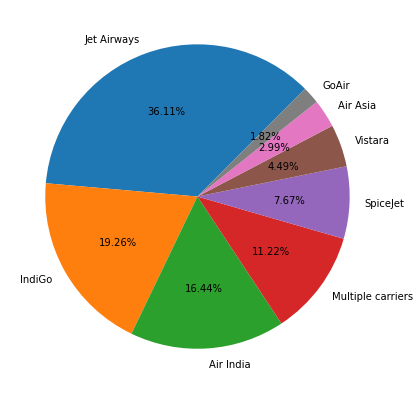

In [ ]:
fig = plt.figure(figsize=(10,7))

plt.pie(values[:8],labels=index[:8],startangle=45,autopct='%.2f%%')


**Observation**
* Total 36.78% Jet Airways flights are available.
* In data 19.62% IndiGo and 16.74% Air India flights are Available.

### Trying out another data set as the above dataset does not cover some stuff we would like to explore and I would keep some task for you guys to do

In [ ]:
import pandas as pd
df = pd.read_csv('forest_fires_dataset.csv',header=1)

df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4   RH           245 non-null    object
 5   Ws           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      245 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [ ]:
df1 = df[df.isna().any(axis=1)]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 122 to 123
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          1 non-null      object
 1   month        0 non-null      object
 2   year         0 non-null      object
 3   Temperature  0 non-null      object
 4   RH           0 non-null      object
 5   Ws           0 non-null      object
 6   Rain         0 non-null      object
 7   FFMC         0 non-null      object
 8   DMC          0 non-null      object
 9   DC           0 non-null      object
 10  ISI          0 non-null      object
 11  BUI          0 non-null      object
 12  FWI          0 non-null      object
 13  Classes      0 non-null      object
dtypes: object(14)
memory usage: 240.0+ bytes


In [ ]:
df.drop([122,123, 124],axis=0,inplace=True)
df.reset_index(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        244 non-null    int64 
 1   day          244 non-null    object
 2   month        244 non-null    object
 3   year         244 non-null    object
 4   Temperature  244 non-null    object
 5   RH           244 non-null    object
 6   Ws           244 non-null    object
 7   Rain         244 non-null    object
 8   FFMC         244 non-null    object
 9   DMC          244 non-null    object
 10  DC           244 non-null    object
 11  ISI          244 non-null    object
 12  BUI          244 non-null    object
 13  FWI          244 non-null    object
 14  Classes      244 non-null    object
dtypes: int64(1), object(14)
memory usage: 28.7+ KB


In [ ]:
df.drop(['index'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


### We notice that the a lot of columns which is supposed to be numerical is represented as Object

In [ ]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
239,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
243,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [ ]:
import numpy as np
list = ['day','month', 'Temperature','RH','Ws']

for i in list:
    df[i] = df[i].apply(np.int64)

In [ ]:
list1 = ['Rain','FFMC','DMC','DC','ISI','BUI','FWI']
for j in list1:
    df[j] = df[j].apply(np.float64)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    object 
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(7), int64(5), object(2)
memory usage: 26.8+ KB


### Change datatype of columns which are supposed to be float values.


In [ ]:
df['Classes'] = df.Classes.replace(to_replace='not fire', value=0)
df['Classes'] = df.Classes.replace(to_replace='fire', value=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    object 
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int64  
dtypes: float64(7), int64(6), object(1)
memory usage: 26.8+ KB


In [ ]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [ ]:
df.skew()

day            0.002806
month          0.000000
year           0.000000
Temperature   -0.196309
RH            -0.237964
Ws             0.545881
Rain           4.579071
FFMC          -1.325633
DMC            1.527652
DC             1.479042
ISI            1.126950
BUI            1.458466
FWI            1.143243
Classes       -0.266220
dtype: float64

In [ ]:
num_feat = [num for num in df.columns if df[num].dtypes !='O']
print('We have {} numerical features are {}'.format(len(num_feat),num_feat))

We have 13 numerical features are ['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']


In [ ]:
for i in enumerate(num_feat):
  print(i)


(0, 'day')
(1, 'month')
(2, 'Temperature')
(3, 'RH')
(4, 'Ws')
(5, 'Rain')
(6, 'FFMC')
(7, 'DMC')
(8, 'DC')
(9, 'ISI')
(10, 'BUI')
(11, 'FWI')
(12, 'Classes')


### Univariate Analysis

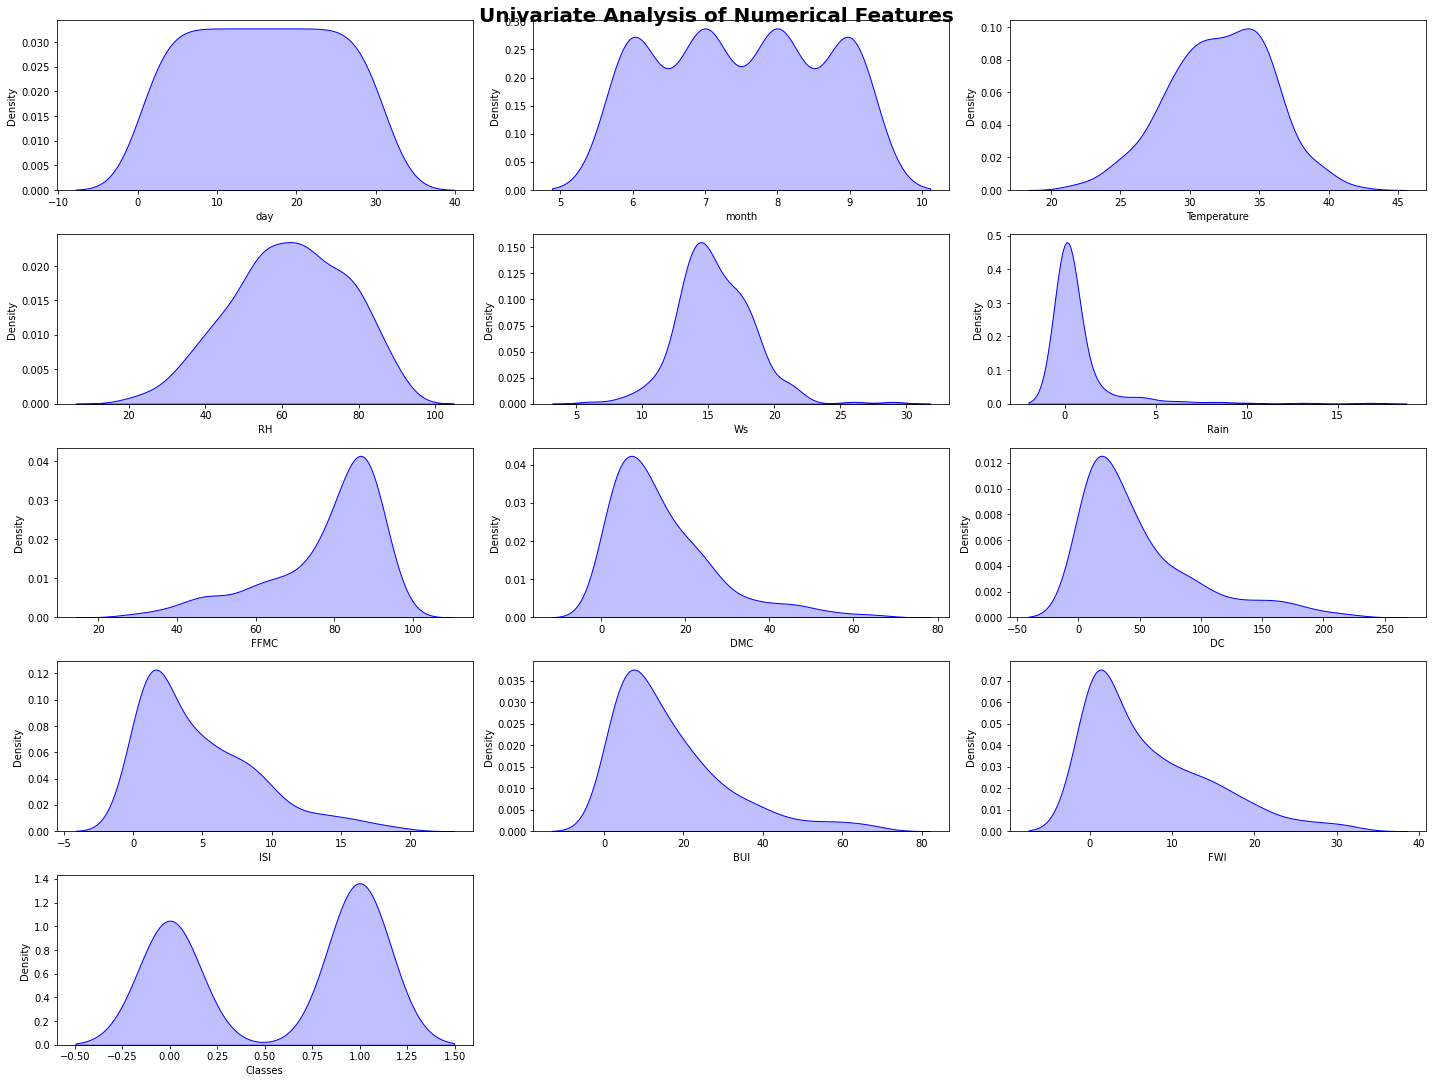

In [ ]:
fig = plt.figure(figsize = (20,15))

plt.suptitle('Univariate Analysis of Numerical Features',fontsize=20,fontweight='bold',y=1.)

for i in enumerate(num_feat):

    plt.subplot(5,3,i[0]+1)
    sns.kdeplot(x=df[num_feat[i[0]]],shade='True',color='b')

    plt.xlabel(num_feat[i[0]])
    plt.tight_layout()

## Multivariate Analysis

In [ ]:
df.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527929,0.179301,0.517224,0.350234,0.201784
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127672,0.063545,0.085567,0.081732,0.022333
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839,0.518119
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457,-0.435023
Ws,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957,-0.066529
Rain,-1.122654e-01,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755,-0.379449
FFMC,2.240321e-01,1.557668e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430,0.770114
DMC,4.915710e-01,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191,0.584188
DC,5.279285e-01,1.276719e-01,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041,0.507122
ISI,1.793008e-01,6.354476e-02,0.605971,-0.688268,0.012245,-0.347862,0.740751,0.678355,0.503919,1.000000,0.641351,0.922422,0.736142


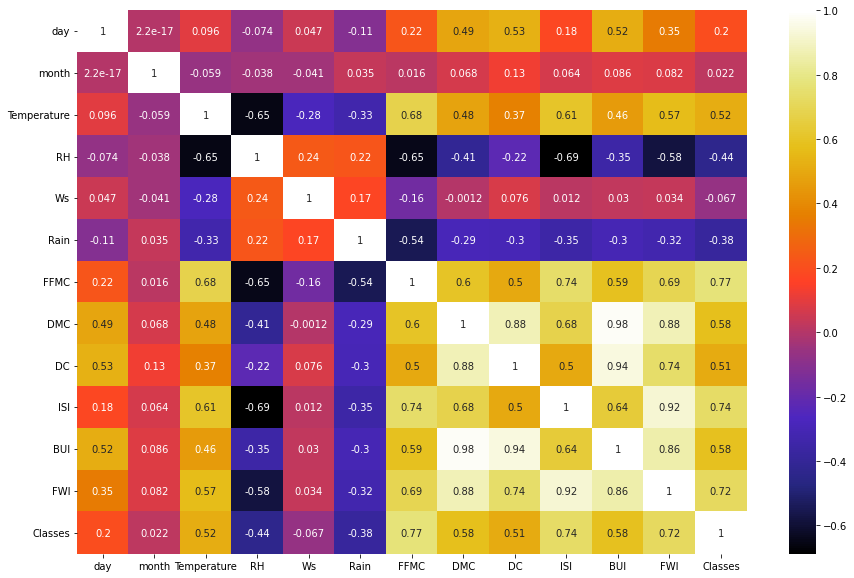

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

### Check the Outliers

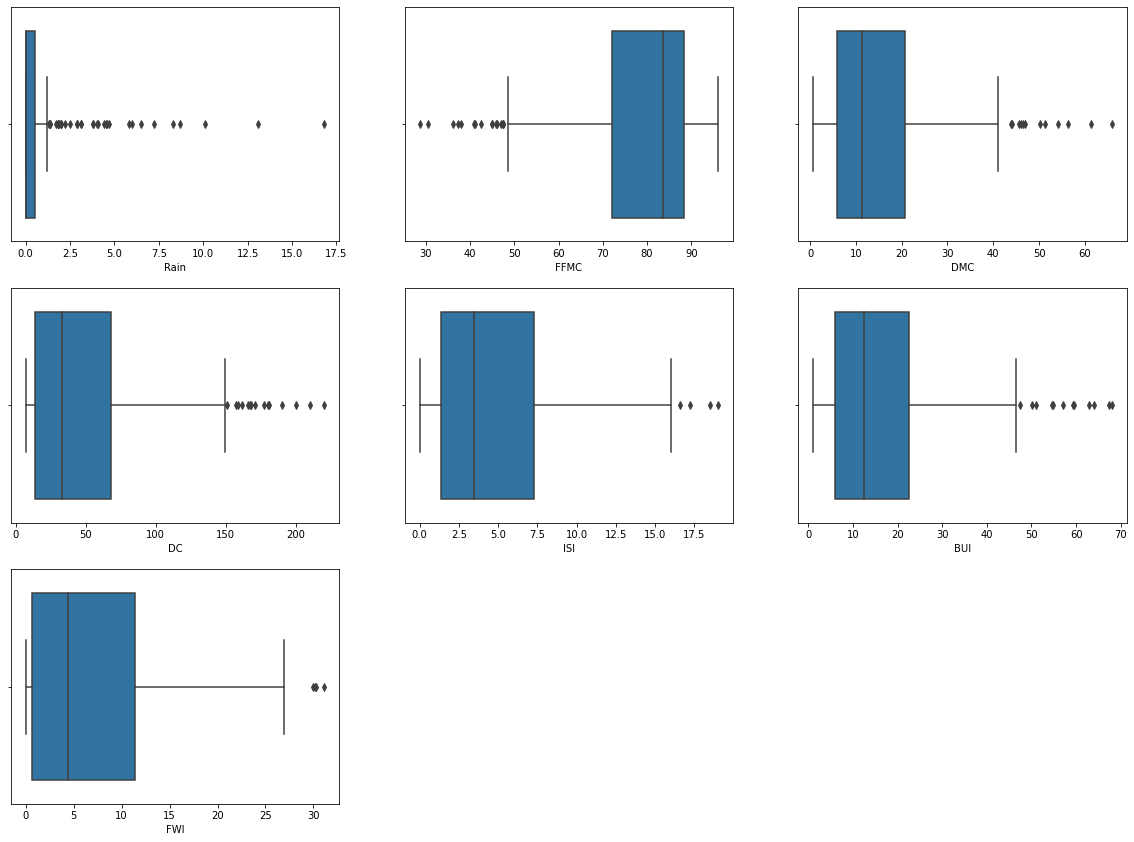

In [ ]:
lst = ['Rain','FFMC','DMC','DC','ISI','BUI','FWI']
plt.figure(figsize=(20,25))
for i in enumerate(lst):
    plt.subplot(5,3,i[0]+1)
    sns.boxplot(data=df,x=lst[i[0]])